Introducción

El análisis a continuación tiene como objetivo presentar los incidentes viales ocurridos en la ciudad de Buenos Aires, Argentina, durante los años 2016 al 2021. Se pretende ofrecer un mayor detalle sobre la ubicación de los incidentes, el número de víctimas, la fecha en que ocurrieron, el tipo de vehículo involucrado y el papel desempeñado por la persona afectada, así como la relación entre estos variables.

Para llevar a cabo este estudio, se emplearán los datos generados y publicados por la Secretaría de Transporte de Buenos Aires sobre los incidentes viales, disponibles en el siguiente enlace: https://data.buenosaires.gob.ar/dataset/victimas-siniestros-viales.

El enfoque estará puesto en realizar un análisis exploratorio de datos, centrándonos en uno de los conjuntos de datos publicados denominado "homicidios". A partir de este conjunto de datos, se extraerá la información necesaria para alcanzar conclusiones válidas sobre la naturaleza de los incidentes viales en la ciudad durante el período mencionado

In [ ]:
import pandas as pd
import openpyxl

Lectura de datos del dataset homicidios.xlsx, hoja HECHOS

In [4]:

df_hechos = pd.read_excel('homicidios.xlsx',sheet_name='HECHOS') #parse_dates=['FECHA'], date_format='%aaaa-%m-%d')
df_hechos.head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Revisar la informacion del dataframe, para mirar numero de filas, numero de columnas, tipo de datos de las columnas y valores no nulos

In [5]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Cambio de algunos nombres de las columnas, para un mejor entendimiento y posterios relacion con la segunda hoja del archivo, nombrada "victimas"

In [6]:
df_hechos=df_hechos.rename(columns={'pos x':'Longitud','pos y':'Latitud','ID':'ID_hecho'})

Verificamos que se haya generado el cambio 

In [7]:
df_hechos.columns

Index(['ID_hecho', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'Longitud', 'Latitud',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [8]:
df_hechos.head(5)

,ID_hecho,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Revisamos la existencia de datos faltantes

In [9]:
df_hechos.isnull().sum()

ID_hecho                   0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
Longitud                   0
Latitud                    0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Dado que los campos "Cruce" y "Altura" indican el lugar donde ocurrió el evento, los valores faltantes en estos campos se registrarán como "True" y "False". Se utilizará "True" cuando el evento ocurrió en "Altura" y "False" cuando ocurrió en "Cruce".

In [10]:
df_hechos= df_hechos.drop('Altura',axis=1)
df_hechos['Cruce'] =df_hechos['Cruce'].notna()


In [11]:
df_hechos.head(5)

,ID_hecho,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,True,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",True,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,False,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,True,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,True,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


El campo direccion normalizada y calle tambien presenta valores faltantes, en este caso se completaran con las letras 'sd', que indican sin datos

In [ ]:
df_hechos ['Dirección Normalizada'].fillna('SD', inplace=True)


In [13]:
df_hechos['Dirección Normalizada'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 696 entries, 0 to 695
Series name: Dirección Normalizada
Non-Null Count  Dtype 
--------------  ----- 
696 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


In [ ]:
df_hechos ['Calle'].fillna('SD', inplace=True)

In [15]:
df_hechos['Calle'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 696 entries, 0 to 695
Series name: Calle
Non-Null Count  Dtype 
--------------  ----- 
696 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


Verificamos nuevamente que los campos ya no tengan valores no nulos

In [16]:
df_hechos.isnull().sum()

ID_hecho                 0
N_VICTIMAS               0
FECHA                    0
AAAA                     0
MM                       0
DD                       0
HORA                     0
HH                       0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
Calle                    0
Cruce                    0
Dirección Normalizada    0
COMUNA                   0
XY (CABA)                0
Longitud                 0
Latitud                  0
PARTICIPANTES            0
VICTIMA                  0
ACUSADO                  0
dtype: int64

verificamos la existencia de datos duplicados

In [17]:
duplicados_totales = df_hechos.duplicated().sum()
print("Número total de filas duplicadas:", duplicados_totales)

duplicados_columna = df_hechos['ID_hecho'].duplicated().sum()
print("Número de filas duplicadas en 'ID_hecho':", duplicados_columna)

filas_duplicadas = df_hechos[df_hechos.duplicated()]
print("Filas duplicadas:")


Número total de filas duplicadas: 0
Número de filas duplicadas en 'ID_hecho': 0
Filas duplicadas:


Por ultimo del dataset hechos, eliminaremos la columna participantes, ya que tenemos la misma informacion en las columnas Victima y acusado y con estas podremos realizar el respectivo analisis. De esta forma tambien optimizaremos la lectura del dataset

In [18]:
df_hechos.drop(columns=['PARTICIPANTES'], inplace=True)

In [19]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_hecho               696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  696 non-null    object        
 11  Cruce                  696 non-null    bool          
 12  Dirección Normalizada  696 non-null    object        
 13  COMUN

REVISION DEL DATASET HOMICIDIOS.XSLX, HOJA 'VICTIMAS'

In [20]:
df_victimas= pd.read_excel("homicidios.xlsx", "VICTIMAS")
df_victimas.head(5)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Revisar la informacion del dataframe, para mirar numero de filas, numero de columnas, tipo de datos de las columnas y valores no nulos

In [21]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Revisamos la existencia de datos nulos 

In [22]:
df_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

Revisamos si hay datos duplicados 

In [23]:
duplicados_totales_victimas = df_victimas.duplicated().sum()
print("Número total de filas duplicadas:", duplicados_totales)

duplicados_columna_victimas = df_hechos['ID_hecho'].duplicated().sum()
print("Número de filas duplicadas en 'ID_hecho':", duplicados_columna)

filas_duplicadas_victimas = df_victimas[df_victimas.duplicated()]
print("Filas duplicadas:")

Número total de filas duplicadas: 0
Número de filas duplicadas en 'ID_hecho': 0
Filas duplicadas:


Al revisar el conjunto de datos, se observa que el campo "fecha_fallecimiento" no está en el formato datetime64[ns] requerido (AAAA-MM-DD). Esto se debe a la presencia de 68 registros con valores 'SD'. Por lo tanto, se procede a cambiar el formato de esta columna a fecha para facilitar su manipulación posterior

In [24]:
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'], errors='coerce')
for idx, row in df_victimas.iterrows():
    if pd.isnull(row['FECHA_FALLECIMIENTO']):
        df_victimas.at[idx, 'FECHA_FALLECIMIENTO'] = '2024-02-20'  
print(df_victimas['FECHA_FALLECIMIENTO'].dtype)

datetime64[ns]


In [25]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 56.1+ KB


Habiendo realizado la revision de los datos, en cuanto a duplicados, valores faltantes procederemos a unir los datasets 'hechos' y 'victimas'

In [26]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_hecho               696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  696 non-null    object        
 11  Cruce                  696 non-null    bool          
 12  Dirección Normalizada  696 non-null    object        
 13  COMUN

In [27]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 56.1+ KB


Para hacer esta union entre ambos dataset, vemos que tienen columnas en comun como lo es fecha, AAAA, MM, DD y victima los eliminare del dataset victimas para evitar duplicados y poder hacer la union por la columna ID_hecho. 

In [28]:
df_victimas= df_victimas.drop(columns=['FECHA','AAAA','MM','DD','VICTIMA'])

In [ ]:
df_victimas['EDAD'] = df_victimas['EDAD'].replace('SD', pd.NA)
df_victimas['EDAD'].fillna(df_victimas['EDAD'].mode().iloc[0], inplace=True)


In [138]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   ROL                  717 non-null    object        
 2   SEXO                 717 non-null    object        
 3   EDAD                 717 non-null    int64         
 4   FECHA_FALLECIMIENTO  717 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 28.1+ KB


Realizamos la union de los dos datasets

In [139]:
df_union = pd.merge(df_hechos, df_victimas, on='ID_hecho', how='inner')

Revisamos en con los primeros cinco registros, que se haya ejecutado la union 

In [140]:
df_union.head(5)

,ID_hecho,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,COMUNA,XY (CABA),Longitud,Latitud,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO,SD,CONDUCTOR,MASCULINO,18,2024-02-20
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01


Revisamos que al momento de hacer la union, el tipo del dato este correcto y que los cambios que se hicieron previamente esten registrados

In [141]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_hecho               717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA                  717 non-null    datetime64[ns]
 3   AAAA                   717 non-null    int64         
 4   MM                     717 non-null    int64         
 5   DD                     717 non-null    int64         
 6   HORA                   717 non-null    object        
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  717 non-null    object        
 11  Cruce                  717 non-null    bool          
 12  Dirección Normalizada  717 non-null    object        
 13  COMUN

Una vez que contamos con el archivo unificado, procedemos a llevar a cabo un análisis exploratorio de los datos mediante gráficos, con el fin de detectar posibles anomalías o alguna variacion en los mismos

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [34]:
df_union.head(5)

,ID_hecho,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,COMUNA,XY (CABA),Longitud,Latitud,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO,SD,CONDUCTOR,MASCULINO,18,2024-02-20
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01


Numero de victimas por año

In [108]:
df_union=pd.DataFrame(df_union)
df_agrupado = df_union.groupby('AAAA')['N_VICTIMAS'].count().reset_index()
print(df_agrupado.to_string(index=False))

 AAAA  N_VICTIMAS
 2016         146
 2017         140
 2018         149
 2019         104
 2020          81
 2021          97


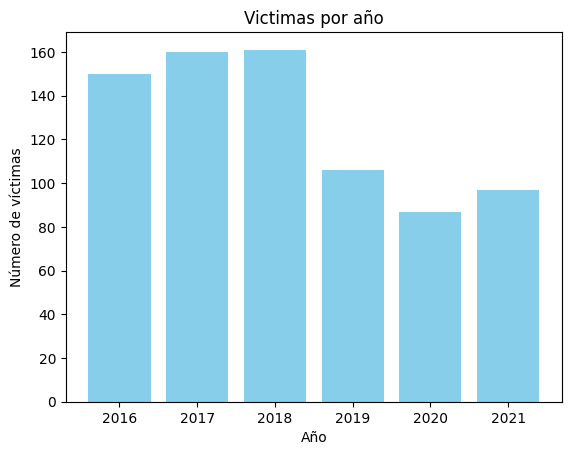

In [45]:
plt.title('Victimas por año')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
df_union=pd.DataFrame(df_union)
df_agrupado = df_union.groupby('AAAA')['N_VICTIMAS'].sum().reset_index()
plt.bar(df_agrupado['AAAA'], df_agrupado['N_VICTIMAS'], color='skyblue')
plt.show()

El grafico nos muestra las victimas totales generadas por año, del 2016 al 2021 en la ciudad de Buenos Aires. Nos indica que hubo mayor cantidad de victimas en los años 2017 y 2018 y una menor cantidad en el 2020, mostrando una reduccion aproximadamente del 50% con respecto al 2018 que fue el año que mas registros tiene; podriamos deducir que hubo alguna situacion social,politica y/o cultural que cambio la forma de como las personas se transportaban en la ciudad. 

Numero de victimas por mes 

In [109]:
df_union=pd.DataFrame(df_union)
df_agrupado = df_union.groupby('MM')['N_VICTIMAS'].count().reset_index()
meses = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'}
df_agrupado['Mes'] = df_agrupado['MM'].map(lambda x: meses.get(x, x))
print(df_agrupado[['Mes', 'N_VICTIMAS']])


           Mes  N_VICTIMAS
0        enero          62
1      febrero          59
2        marzo          56
3        abril          52
4         mayo          60
5        junio          58
6        julio          51
7       agosto          67
8   septiembre          51
9      octubre          52
10   noviembre          68
11   diciembre          81


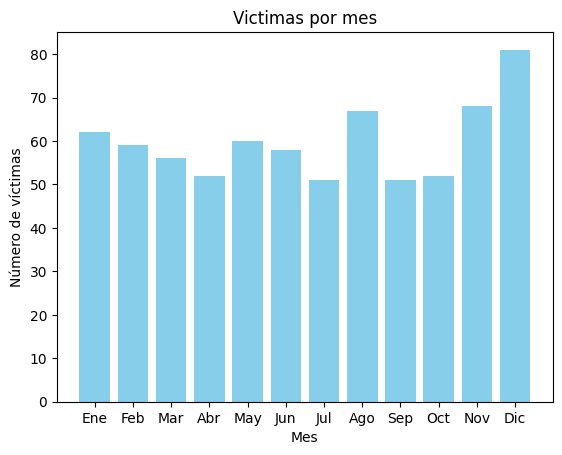

In [118]:
plt.title('Victimas por mes')
plt.xlabel('Mes')
plt.ylabel('Número de víctimas')
df_union=pd.DataFrame(df_union)
df_agrupado = df_union.groupby('MM')['N_VICTIMAS'].count().reset_index()
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.bar(df_agrupado['MM'], df_agrupado['N_VICTIMAS'], color='skyblue')
plt.show()


El grafico nos muestra la cantidad de victimas totales por mes, en un periodo de 6 años, desde el 2016 al 2021 en la ciudad de Buenos Aires. Segun la grafica, contamos con 3 meses con mayor cantidad de victimas, que son: mayo, agosto y diciembre, son meses que debido a las festividades, como sucede por ejemplo en diciembre, se genera mayor actividad por parte de los ciudadanos y por ende mas cantidad de accidentes y victimas. Julio y septiembre son los meses comn menor e igual numero de victimas, podriamos deducir a que es un periodo de vacaciones y muchas personas saldran a otras ciudades. 

Numero de victimas por dia 

In [124]:
df_union=pd.DataFrame(df_union)
df_agrupado = df_union.groupby('DD')['N_VICTIMAS'].sum().reset_index()
print(df_agrupado.to_string(index=False))

 DD  N_VICTIMAS
  1          18
  2          28
  3          30
  4          23
  5          21
  6          22
  7          23
  8          14
  9          31
 10          28
 11          30
 12          26
 13          18
 14          29
 15          25
 16          18
 17          30
 18          26
 19          23
 20          34
 21          20
 22          23
 23          32
 24          20
 25          30
 26          24
 27          27
 28          28
 29          28
 30          19
 31          13


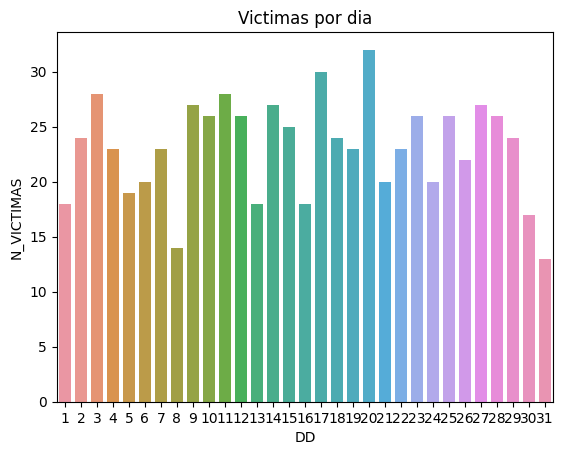

<Figure size 800x400 with 0 Axes>

In [123]:
plt.title('Victimas por dia')
plt.xlabel('Dia')
plt.ylabel('Número de víctimas')
dia= df_union.groupby('DD')['N_VICTIMAS'].count().reset_index()
ax = sns.barplot(x='DD', y='N_VICTIMAS', data=dia)
plt.figure(figsize=(8,4))
plt.show()

CARACTERIZACION DE VICTIMAS 

Text(0, 0.5, 'Número de víctimas')

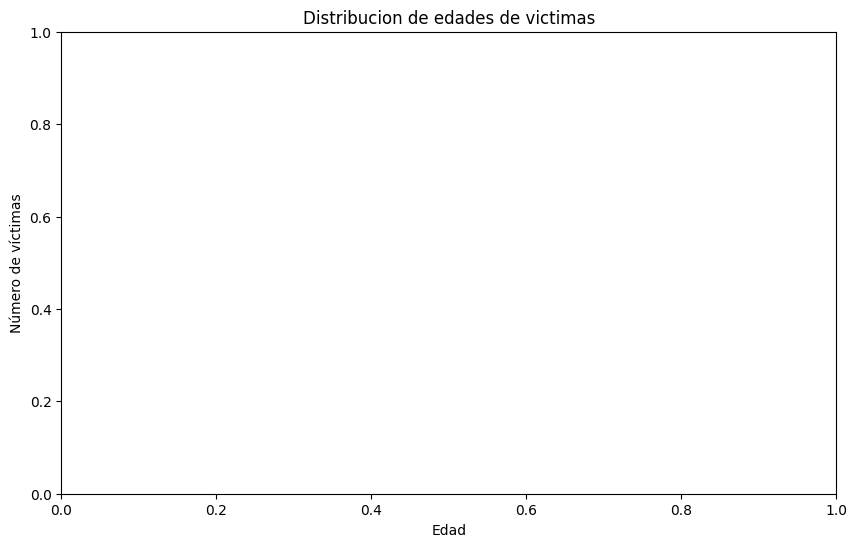

In [153]:
rangos_edad = pd.cut(df_union['EDAD'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
conteo_edades = rangos_edad.value_counts().sort_index()
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(conteo_edades / max(conteo_edades))
conteo_edades.plot(kind='bar', color=colors)
#conteo_edades.plot(kind='bar', color='skyblue')
#plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
plt.title('Distribucion de edades de victimas')
plt.xlabel('Edad')
plt.ylabel('Número de víctimas')